# Árboles de decisión: 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
!pip install -U scikit-learn

In [3]:
import sklearn

In [4]:
print (sklearn.__version__)

1.0.1


In [6]:
### Datos = iris
# Desde seaborn

In [7]:
iris= sb.load_dataset('iris')

In [8]:
# metemos train

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= iris.drop ('species', axis= 1)
y= iris['species']

In [11]:
X_train, X_test, y_train, y_test= train_test_split (X,y,test_size=0.30,random_state=33)

### nuevo: metemos paquetes de decision de árboles

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
arbol=DecisionTreeClassifier()

In [14]:
# y ahora metemos en nuestro "arbol"
arbol.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn import tree

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [39, 35, 31]'),
 Text(136.96363636363637, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(197.83636363636364, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 35, 31]'),
 Text(121.74545454545455, 126.83999999999999, 'X[2] <= 5.05\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(60.872727272727275, 90.6, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(30.436363636363637, 54.359999999999985, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(91.30909090909091, 54.359999999999985, 'X[2] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(60.872727272727275, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(121.74545454545455, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(182.61818181818182, 90.6, 'X[1] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(152.18181

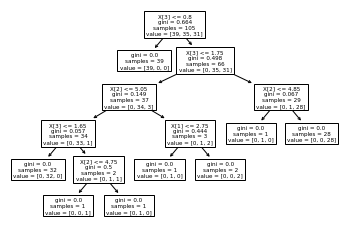

In [16]:
tree.plot_tree (arbol)
# ploteamos nuestro tree

In [17]:
X_nombre= list (X.columns)
classes=['setosa','versicolor','virginica']

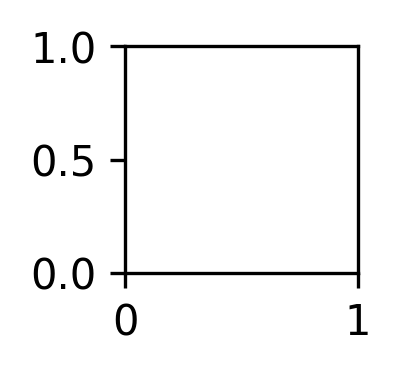

In [19]:
#subplot
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(1,1), dpi=300)

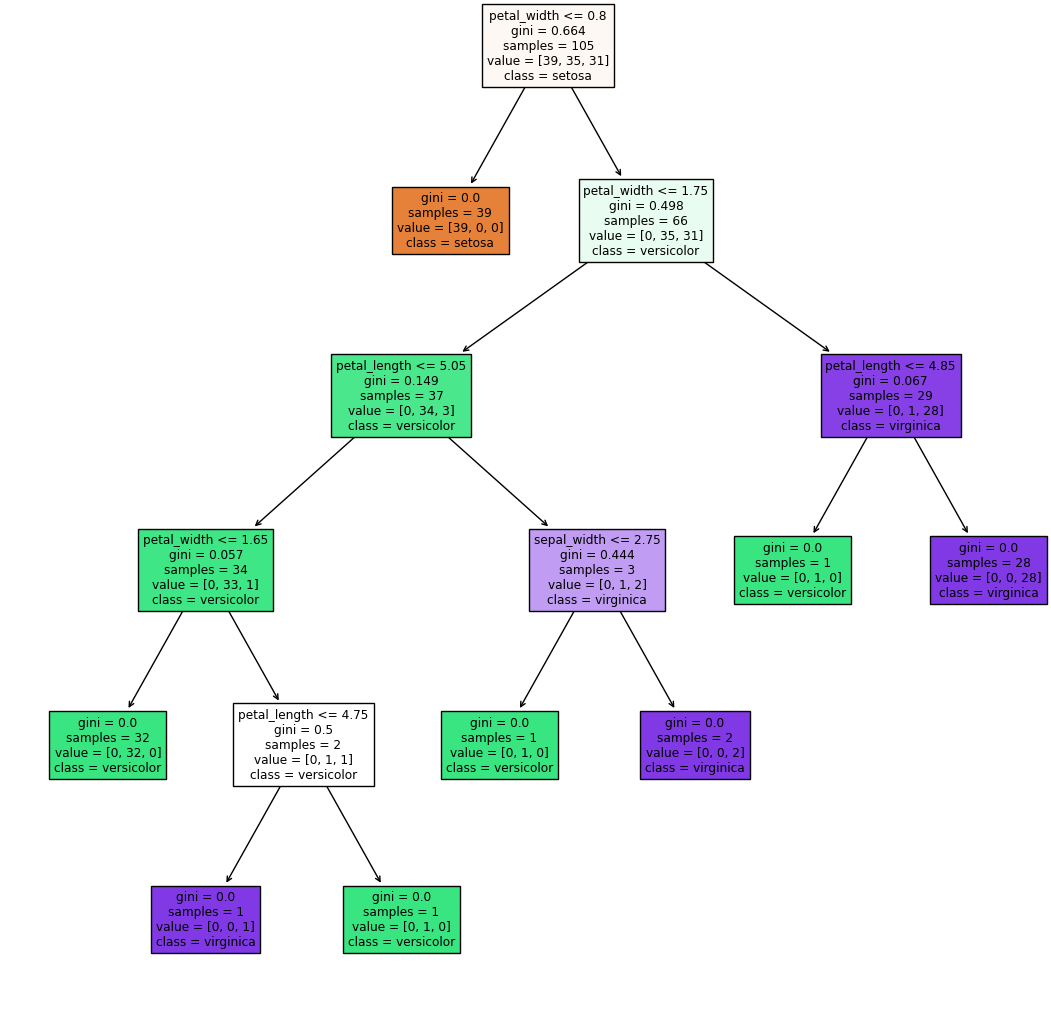

In [28]:
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=100)
tree.plot_tree(arbol,
              feature_names= X_nombre,
              class_names= classes,
              filled= True);
fig.savefig('miarbol.png')

In [29]:
## ahora con nuestro arbol podemos hacer nuestra predicción

In [30]:
mipred= arbol.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print (confusion_matrix(y_test, mipred))
print (classification_report(y_test, mipred))

[[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



In [35]:
# ahora podriamos seguir haciendo arboles aleatorios y hacer un bosque y elegir el mejor
#sklearn es mi amigo y lo hace por mi

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#instanciamos
#n_estimators es el nº de bosques

In [60]:
rfc= RandomForestClassifier(n_estimators=5, random_state= 33)

In [61]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=33)

In [62]:
#instanciamos

In [63]:
rfc_pred= rfc.predict(X_test)

In [64]:
print (confusion_matrix(y_test, rfc_pred))
print (classification_report(y_test, rfc_pred))

[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [65]:
# ha mejorado un poquito, podemos probar con más, con menos..npredictions y quedarnos con las justas donde ya no mejora
# empecé con 30 n predictors y decidí poner 5

# Aplicando árboles a Titanic

In [66]:
#en print classification report podemos ver si mejora la precisión (macro avg) aplicando este
#nos da la misma exactitud en este caso( siempre?)